In [2]:
import pandas as pd
import numpy as np
from sys import path

path.append('../')
from src.feature_extraction.handcrafted import handcrafted_eda_features

# USILaughs

In [ ]:
path_to_data: str =  "../data.nosync/usilaughs/EDA_segmented.npz"

In [3]:
eda_data = np.load(path_to_data, allow_pickle=True)

In [4]:
eda_data.keys()

KeysView(NpzFile '../data.nosync/usilaughs/EDA_segmented.npz' with keys: values_left, values_right, labels_left, labels_right, groups_left...)

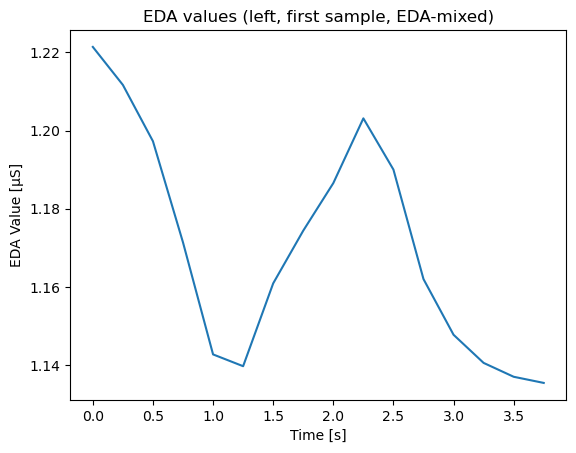

In [ ]:
import matplotlib.pyplot as plt

num_samples = eda_data['values_left'][0,:,0].shape[0]
time = np.arange(num_samples) / 4  # each sample is 1/4 second

plt.plot(time, eda_data['values_left'][0,:,0])
plt.title('EDA values (left, first sample, EDA-mixed)')
plt.xlabel('Time [s]')
plt.ylabel('EDA Value [μS]')
plt.show()

I'm testing whether the feature extraction works out of the box with the array we're loading.

In [6]:
handcrafted_eda_features(eda_data['values_left']).shape

Could not extract EDA peaks. Reason: zero-size array to reduction operation maximum which has no identity
/Users/leonardoalchieri/mambaforge/envs/pff/lib/python3.13/site-packages/neurokit2/eda/eda_peaks.py:127: RuntimeWarning: All-NaN slice encountered
  info["SCR_Peaks"] > np.nanmin(info["SCR_Onsets"]), ~np.isnan(info["SCR_Onsets"])
Could not extract EDA peaks. Reason: zero-size array to reduction operation maximum which has no identity
/Users/leonardoalchieri/mambaforge/envs/pff/lib/python3.13/site-packages/neurokit2/eda/eda_peaks.py:127: RuntimeWarning: All-NaN slice encountered
  info["SCR_Peaks"] > np.nanmin(info["SCR_Onsets"]), ~np.isnan(info["SCR_Onsets"])
Could not extract EDA peaks. Reason: zero-size array to reduction operation maximum which has no identity
/Users/leonardoalchieri/mambaforge/envs/pff/lib/python3.13/site-packages/neurokit2/eda/eda_peaks.py:127: RuntimeWarning: All-NaN slice encountered
  info["SCR_Peaks"] > np.nanmin(info["SCR_Onsets"]), ~np.isnan(info["SCR_On

(810, 15, 3)

# APSYNC

I have to create the same structure as the dataset above, using the same pre-processing and segmentation.

Structure of the array:
- Keys, which are values (the EDA signals segmented), labels (0 and 1 for USILaughs, referred to cognitive load and relaxation) and groups (the users).
- The values have shape (N_samples, Length, Components), where the components are, in order: mixed, phasic and tonic. The Length is 4 seconds (16 samples at 4Hz).